<a href="https://colab.research.google.com/github/yeshg11/Day-ahead-weather-prediction-model/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
weather=pd.read_csv("weather_data.csv",index_col="DATE")
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TAVG,TMAX,TMIN
DATE,,,,,,,,
08-08-2003,USR0000CWEE,"WEED AIRPORT CALIFORNIA, CA US",41.4789,-122.4539,893.1,67,79,52
09-08-2003,USR0000CWEE,"WEED AIRPORT CALIFORNIA, CA US",41.4789,-122.4539,893.1,72,81,62
10-08-2003,USR0000CWEE,"WEED AIRPORT CALIFORNIA, CA US",41.4789,-122.4539,893.1,71,83,56
11-08-2003,USR0000CWEE,"WEED AIRPORT CALIFORNIA, CA US",41.4789,-122.4539,893.1,65,82,50
12-08-2003,USR0000CWEE,"WEED AIRPORT CALIFORNIA, CA US",41.4789,-122.4539,893.1,65,83,47
...,...,...,...,...,...,...,...,...
04-08-2023,USR0000CWEE,"WEED AIRPORT CALIFORNIA, CA US",41.4789,-122.4539,893.1,74,92,57
05-08-2023,USR0000CWEE,"WEED AIRPORT CALIFORNIA, CA US",41.4789,-122.4539,893.1,75,90,57
06-08-2023,USR0000CWEE,"WEED AIRPORT CALIFORNIA, CA US",41.4789,-122.4539,893.1,73,86,56


In [ ]:
#check for missing values
weather.apply(pd.isnull).sum()

STATION      0
NAME         0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
TAVG         0
TMAX         0
TMIN         0
dtype: int64

In [ ]:
core_weather=weather[["TMAX","TMIN","TAVG"]].copy()
core_weather.columns=["T_max","T_min","T_avg"]
core_weather

,T_max,T_min,T_avg
DATE,,,
08-08-2003,79,52,67
09-08-2003,81,62,72
10-08-2003,83,56,71
11-08-2003,82,50,65
12-08-2003,83,47,65
...,...,...,...
04-08-2023,92,57,74
05-08-2023,90,57,75
06-08-2023,86,56,73


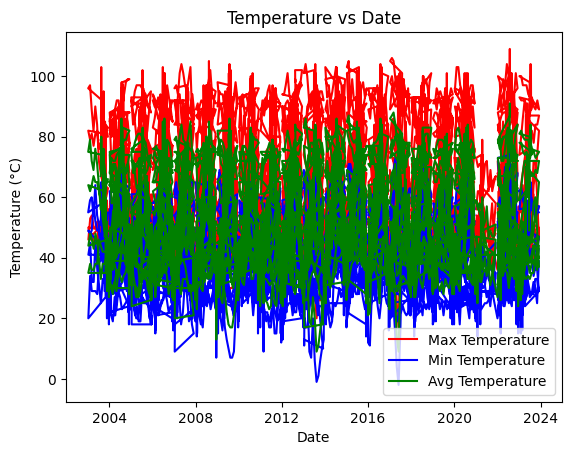

In [ ]:
import matplotlib.pyplot as plt
plt.plot(core_weather.index, core_weather['T_max'], color='red', label='Max Temperature')
plt.plot(core_weather.index, core_weather['T_min'], color='blue', label='Min Temperature')
plt.plot(core_weather.index, core_weather['T_avg'], color='green', label='Avg Temperature')
plt.title('Temperature Readings')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Date')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

In [ ]:
core_weather.dtypes
core_weather.index=pd.to_datetime(core_weather.index)

Text(0, 0.5, 'Temperature (°C)')

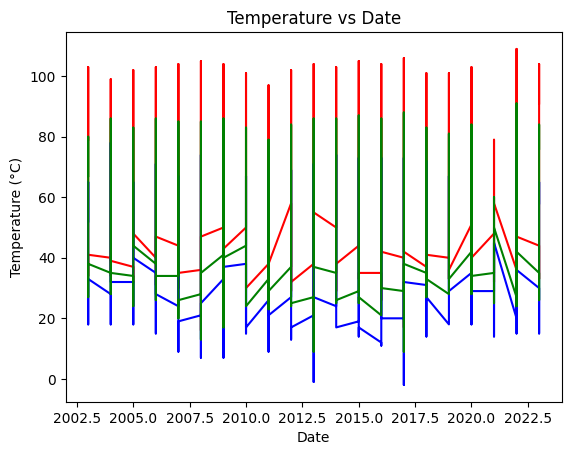

In [ ]:
import matplotlib.pyplot as plt
plt.plot(core_weather.index.year, core_weather['T_max'], color='red', label='Max Temperature')
plt.plot(core_weather.index.year, core_weather['T_min'], color='blue', label='Min Temperature')
plt.plot(core_weather.index.year, core_weather['T_avg'], color='green', label='Avg Temperature')
plt.title('Temperature Readings')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Date')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

In [ ]:
core_weather.index.year.value_counts().sort_index()

2003    146
2004    365
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    114
2022    365
2023    218
Name: DATE, dtype: int64

,T_max,T_min,T_avg,target
DATE,,,,
2003-08-08,79,52,67,NaN
2003-09-08,81,62,72,79.0
2003-10-08,83,56,71,81.0
2003-11-08,82,50,65,83.0
2003-12-08,83,47,65,82.0
...,...,...,...,...
2023-04-08,92,57,74,92.0
2023-05-08,90,57,75,92.0
2023-06-08,86,56,73,90.0


In [ ]:
core_weather['Target']=core_weather.shift(-1)['T_avg']
core_weather=core_weather.iloc[:-1,:].copy()
core_weather

,T_max,T_min,T_avg,Target
DATE,,,,
08-08-2003,79,52,67,72.0
09-08-2003,81,62,72,71.0
10-08-2003,83,56,71,65.0
11-08-2003,82,50,65,65.0
12-08-2003,83,47,65,69.0
...,...,...,...,...
02-08-2023,92,62,78,75.0
03-08-2023,92,59,75,74.0
04-08-2023,92,57,74,75.0


In [ ]:
d= core_weather.loc[:"01-03-2019"]
X_train=d.iloc[:,:-1].copy()
Y_train=d.iloc[:,-1].copy()
dt = core_weather.loc["02-03-2019":]
X_test=dt.iloc[:,:-1].copy()
Y_test=dt.iloc[:,-1].copy()



In [ ]:
model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64,  recurrent_dropout=0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Increase the number of epochs for training
model.fit(X_train, Y_train, epochs=200, batch_size=32)


Epoch 1/200
178/178 [==============================] - 4s 6ms/step - loss: 2777.5676 - mean_absolute_error: 50.4402
Epoch 2/200
178/178 [==============================] - 1s 6ms/step - loss: 2410.0125 - mean_absolute_error: 46.6940
Epoch 3/200
178/178 [==============================] - 2s 9ms/step - loss: 2160.6108 - mean_absolute_error: 43.9484
Epoch 4/200
178/178 [==============================] - 1s 8ms/step - loss: 1941.0675 - mean_absolute_error: 41.3669
Epoch 5/200
178/178 [==============================] - 1s 6ms/step - loss: 1743.0420 - mean_absolute_error: 38.9031
Epoch 6/200
178/178 [==============================] - 1s 6ms/step - loss: 1563.0885 - mean_absolute_error: 36.5371
Epoch 7/200
178/178 [==============================] - 1s 6ms/step - loss: 1399.5863 - mean_absolute_error: 34.2254
Epoch 8/200
178/178 [==============================] - 1s 6ms/step - loss: 1251.3638 - mean_absolute_error: 31.9921
Epoch 9/200
178/178 [==============================] - 1s 7ms/step - los

In [ ]:
predictions = pd.Series(model.predict(X_test).squeeze(), index=Y_test.index)
combined = pd.concat([Y_test, predictions], axis=1)
combined.columns = ['Actual', 'Predicted']
print(combined)



43/43 [==============================] - 0s 2ms/step
            Actual  Predicted
DATE                         
02-03-2019    44.0  39.661480
03-03-2019    42.0  44.360775
04-03-2019    40.0  41.970619
05-03-2019    44.0  40.772778
06-03-2019    39.0  44.299057
...            ...        ...
02-08-2023    75.0  76.023430
03-08-2023    74.0  74.526833
04-08-2023    75.0  74.132439
05-08-2023    73.0  74.078835
06-08-2023    73.0  71.603249

[1366 rows x 2 columns]


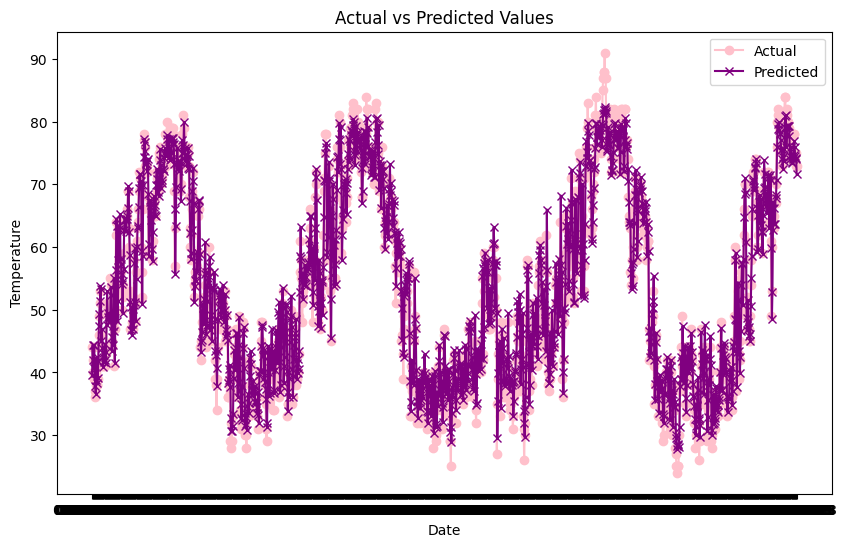

R-squared (R2) score: 0.9297379792241831


In [ ]:
from sklearn.metrics import mean_absolute_error
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test.values, label='Actual', marker='o',color='pink')
plt.plot(predictions.index, predictions.values, label='Predicted', marker='x',color='purple')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
mean_absolute_error(predictions,Y_test)
from sklearn.metrics import r2_score

r2 = r2_score(Y_test.values, predictions.values)
print("R-squared (R2) score:", r2)


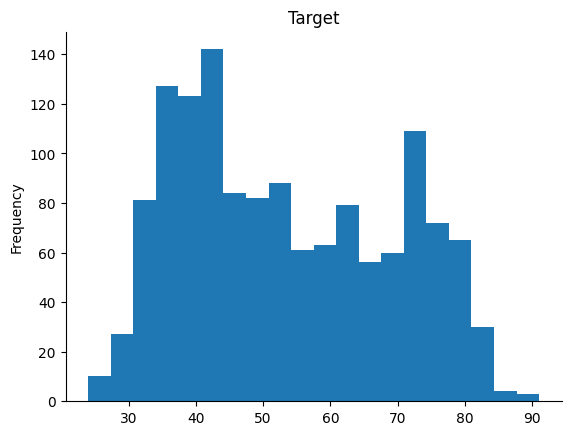

In [ ]:
# @title Target

from matplotlib import pyplot as plt
combined['Target'].plot(kind='hist', bins=20, title='Target')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
model.predict([[50,46,52]])

1/1 [==============================] - 0s 38ms/step


array([[48.44966]], dtype=float32)